In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
def mnist_read():
    with open('./train-labels-idx1-ubyte', 'rb') as binary_file: #processing training labels
        binary_file.seek(0)  # Go to beginning
        #Reading first 4 bytes to extract the magic number
        magic_number = binary_file.read(4)
        #unpacking couple_bytes as a 4byte signed integer with Big-endian Byte order
        train_magic_number = struct.unpack('>i',magic_number) 
        #print(magic_number)
        #unpacking next 4 bytes to extract the number of items
        nitems = binary_file.read(4)
        nitems = struct.unpack('>i',nitems)
        #print(nitems)
        # Next, we use np.fromfile to create an array from data in a binary file(var)
        train_labels = np.fromfile(binary_file, np.uint8) #labels are an unsigned byte --> np.uint8 
        # More info: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.fromfile.html
        #print (train_labels)
    with open('./train-images-idx3-ubyte', 'rb') as binary_file: #processing training images
        # reading the first 16 bytes: 
        # 4bytes: magic_number | 4bytes: # of images | 4bites: # of rows | 4bytes: # of cols
        data = binary_file.read(16) 
        magic_number, ntrimages, rows, cols = struct.unpack('>iiii', data)
        #print (magic_number, ntrimages, rows, cols)
        # extracting images and storing them into a numpy array (note that each image is stored as a vector, so we need to reshape it in the matrix form)
        train_images = np.fromfile(binary_file, np.uint8).reshape(ntrimages, rows, cols)
    with open('./t10k-labels-idx1-ubyte', 'rb') as binary_file:
        data = binary_file.read(8)
        magic_number, ntelabels = struct.unpack('>ii',data)
        #print (magic_number, ntelabels)
        test_labels = np.fromfile(binary_file, np.uint8) #reading the labels
    with open('./t10k-images-idx3-ubyte', 'rb') as binary_file:
        data = binary_file.read(16)
        magic_number, nteimages, rows, cols = struct.unpack('>iiii', data)
        #print (magic_number, nteimages, rows, cols)
        test_images = np.fromfile(binary_file, np.uint8).reshape(nteimages, rows, cols)
    return train_images, train_labels, ntrimages, test_images, test_labels, nteimages

In [3]:
train_images, train_labels, ntrimages, test_images, test_labels, nteimages = mnist_read()

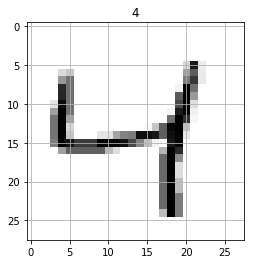

In [4]:
plt.imshow(train_images[2], cmap=cm.Greys)
plt.title(train_labels[2])
plt.grid()